# Machine Learning Basics

Adapted from the Python Data Science Handbook: https://jakevdp.github.io/PythonDataScienceHandbook/

In [31]:
import numpy as np
import pandas as pd
import random

import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

## <span style="color:red">Unsupervised Learning</span>

### Clustering

A clustering algorithm attempts to find distinct groups of data without reference to any labels.

#### [K-means Clustering](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. The typical approach to k-means involves an intuitive iterative approach known as expectation–maximization (E-M), an iterative process by which a center is guessed, points are assigned to the nearest cluster, and then the center is set to the points mean. 

It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

Given simple, well-separated data, k-means finds suitable clustering results.

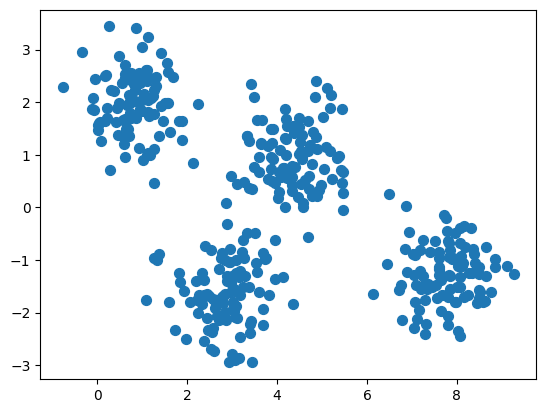

/home/jt/venvs/python3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


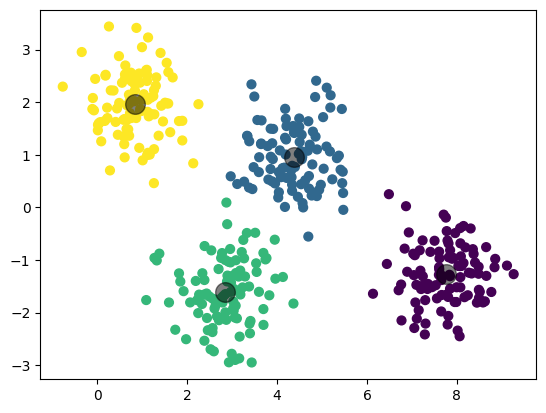

In [107]:
# Generate some data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

# Plot the Raw data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

NUMBER_OF_CLUSTERS = 4

# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(NUMBER_OF_CLUSTERS, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

#### How many clusters?

The inertia measures how close each node is to the centroid of its cluster. We can use inertia to identify what number of clusters optimizes this metric. 

In [108]:
print("The sum of squared distances is {} with {} clusters".format(kmeans.inertia_,NUMBER_OF_CLUSTERS))

The sum of squared distances is 280.00326975400736 with 4 clusters


In [74]:
K = range(2,10)
Sum_of_squared_distances = []
Silhouette_scores = []
for num_clusters in K:
    kmeans = KMeans(num_clusters, random_state=0)
    kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)
    Silhouette_scores.append(silhouette_score(X,kmeans.labels_))

/home/jt/venvs/python3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jt/venvs/python3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jt/venvs/python3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jt/venvs/python3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

Text(0.5, 0, 'Number of clusters')

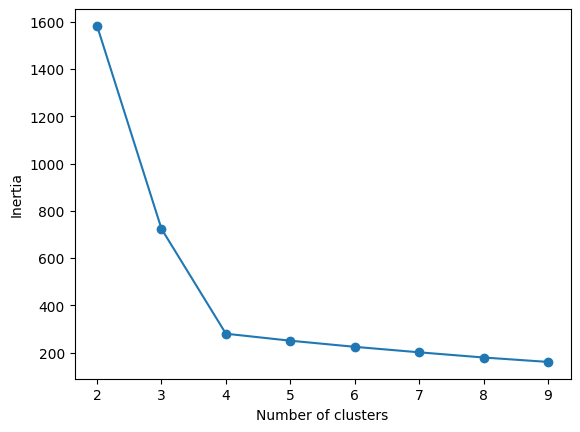

In [75]:
plt.plot(K,Sum_of_squared_distances, 'o-')
plt.ylabel("Inertia")
plt.xlabel("Number of clusters")

Text(0.5, 0, 'Number of clusters')

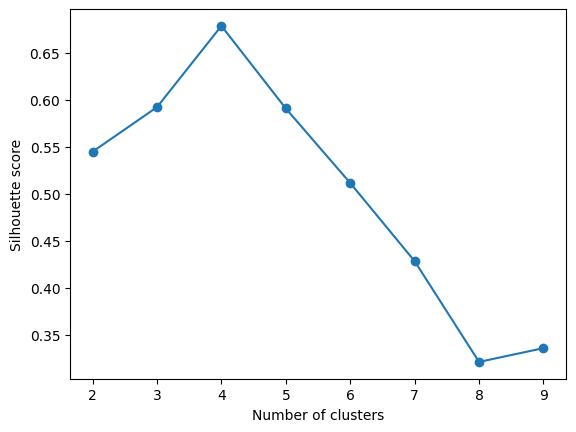

In [58]:
plt.plot(K,Silhouette_scores, 'o-')
plt.ylabel("Silhouette score")
plt.xlabel("Number of clusters")

Two disadvantages of k-means
* Its lack of flexibility in cluster shape
* Lack of probabilistic cluster assignment, mean that for many datasets (especially low-dimensional datasets) it may not perform as well as you might hope

#### Gaussian Mixture Models ([GMM](https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html))

To overcome the weakness of the k-means model, we can use the Gaussian mixture model (GMM) which attempts to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset. In the simplest case, GMMs can be used for finding clusters in the same manner as k-means:

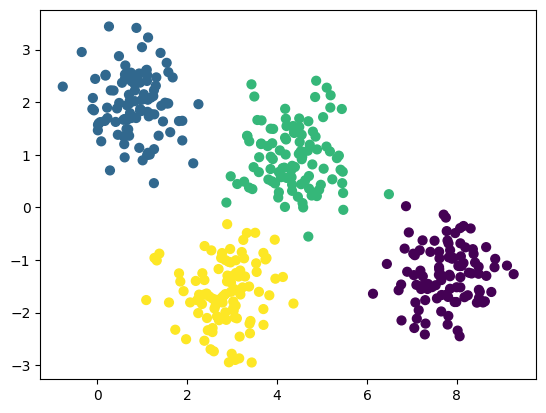

In [11]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

[[0.463 0.    0.537 0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    0.    1.   ]]


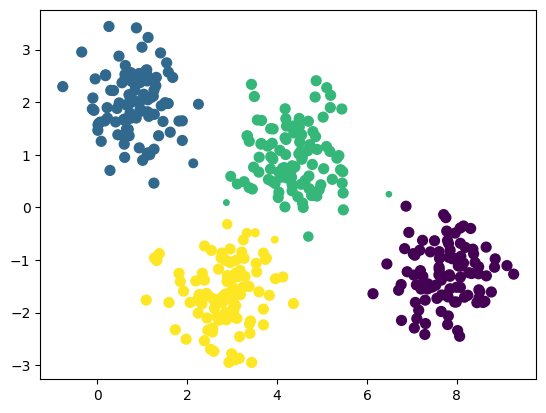

In [12]:
# Extract probability that each point belongs in the cluster
probs = gmm.predict_proba(X)
print(probs[:5].round(3)) # Print Subset of probabilities

# Use probabilities to visualize certainty
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

But because GMM contains a probabilistic model under the hood, it is also possible to find probabilistic cluster assignments—in Scikit-Learn this is done using the predict_proba method. This returns a matrix of size [n_samples, n_clusters] which measures the probability that any point belongs to the given cluster:

### Dimensionality Reduction

#### Principle Component Analysis ([PCA](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html))

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data. Often dimensionality reduction is used as an aid to visualizing data since it is much easier to plot data in two dimensions than in four dimensions or higher.

PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more. A unsupervised learning problem attempts to learn about the relationship between the x and y values and this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset. 

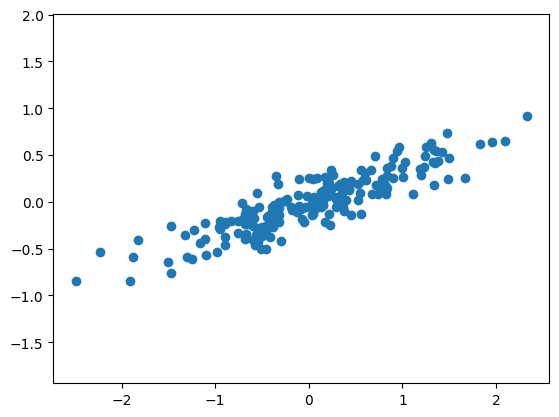

In [63]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [105]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(X)
sum_eigen = sum(pca.explained_variance_)

print("Eigenvalues are: {}".format(pca.explained_variance_))
print("PC1 has elements: {} and explains {:.2f}% of the variance".format(pca.components_[0],100*pca.explained_variance_[0]/sum_eigen))
print("PC2 has elements: {} and explains {:.2f}% of the variance".format(pca.components_[1],100*pca.explained_variance_[1]/sum_eigen))
print("Norms of PC1 and PC2 are {} and {}".format(sum(i**2 for i in pca.components_[0]),
                                                       sum(i**2 for i in pca.components_[1])))

Eigenvalues are: [7.69895517 1.64844173]
PC1 has elements: [ 0.91906747 -0.39410023] and explains 82.36% of the variance
PC2 has elements: [-0.39410023 -0.91906747] and explains 17.64% of the variance
Norms of PC1 and PC2 are 0.9999999999999999 and 0.9999999999999999


To understand these numbers, we can visualize them as vectors over the input data
Using the "components" to define the direction of the vector, 
and the "explained variance" to define the squared-length of the vector:

[Text(0.5, 0, 'component 1'),
 Text(0, 0.5, 'component 2'),
 Text(0.5, 1.0, 'principal components'),
 (-5.0, 5.0),
 (-3.0, 3.1)]

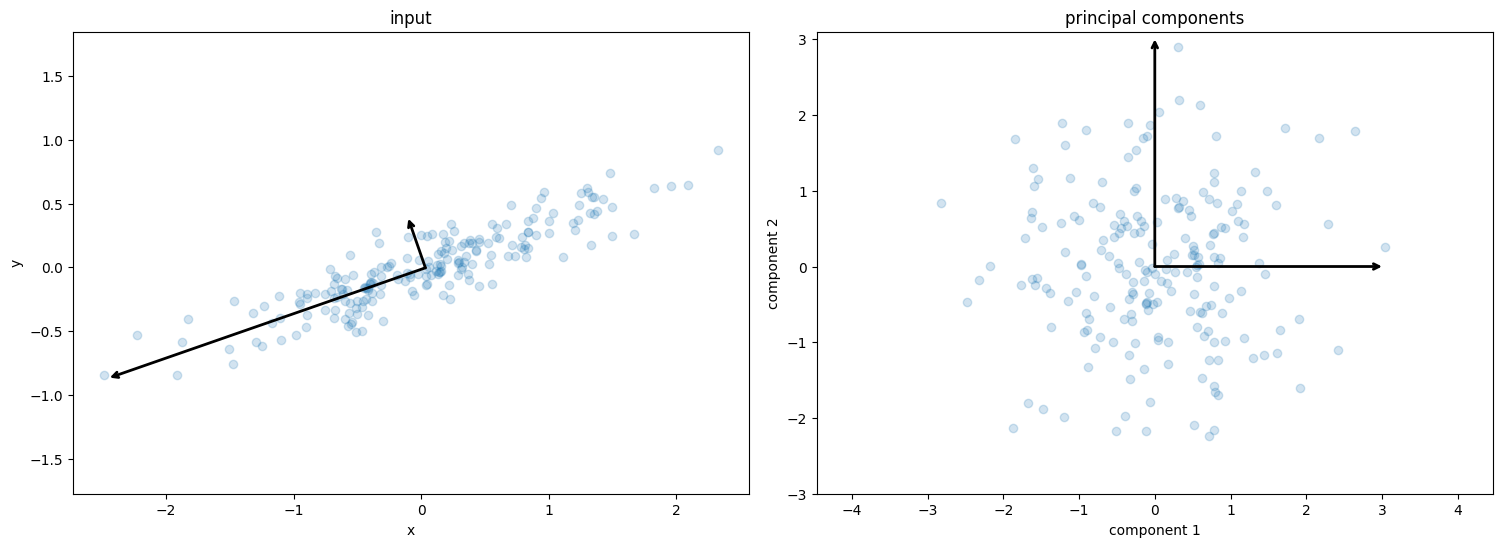

In [65]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# Instantiate Figure
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data with PCs and explained variance vectors
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2) # raw data
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length) # 3*Standard Dev = 99% of distribution
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot the projection of each data point onto the principal axes 
# a.k.a the principal components of the data
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2) # transformed data
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. 

The projection of each data point onto the principal axes are the "principal components" of the data.

From here, we can use PCA as a method of dimensionality reduction which involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance. The transformed data is reduced to a single dimension. 

In [8]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

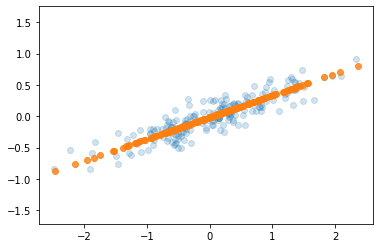

In [9]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The blue points are the original data, while the orange points are the projected version. This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

## <span style="color:red">Supervised Learning</span>

### Linear Regression ([LR](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html))

Linear regression models are a good starting point for regression tasks. Such models are popular because they can be fit very quickly, and are very interpretable.

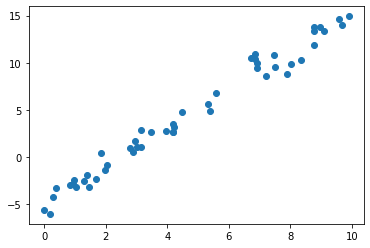

In [10]:
# Example data scattered about a line with a slope of 2 and an intercept of -5:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

We can use Scikit-Learn's LinearRegression estimator to fit this data and construct the best-fit line.

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore. The relevant parameters are coef_ and intercept_.

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


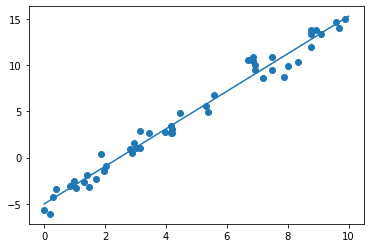

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

plt.scatter(x, y)
plt.plot(xfit, yfit);

LR can also handle multidimensional linear models where there are multiple x values. Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

In [12]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000109
[ 1.5 -2.   1. ]


### Random Forest ([RF](https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html))

Random forests are an example of an ensemble learner built on decision trees. In machine learning implementations of decision trees, the questions generally take the form of axis-aligned splits in the data: that is, each node in the tree splits the data into two groups using a cutoff value within one of the features.

We will use the hand-written digits dataset as an example

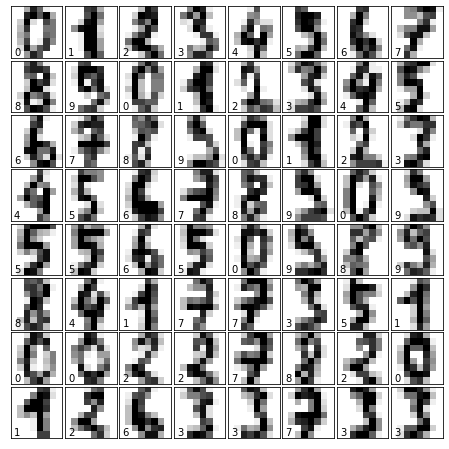

In [13]:
# Load and visualize dataset
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



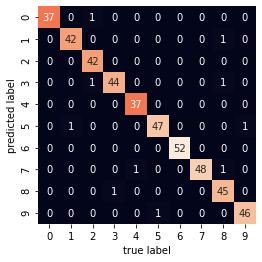

In [14]:
# We can classify the digits using RF
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Split the data into train, and test
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

# Print performance metrics
print(metrics.classification_report(ypred, ytest))

# And performance confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Single-Cell Sequencing Analysis

Single-cell dataset and specific preprocessing from: https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

In [15]:
import numpy as np
import pandas as pd
import random

import scipy.stats as stats
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc

In [16]:
# Load the count matrix into an AnnData object, 
# which holds many slots for annotations and different representations of the data. 
# It also comes with its own HDF5-based file format: .h5ad
adata_orig = sc.datasets.pbmc3k()
adata_orig 

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

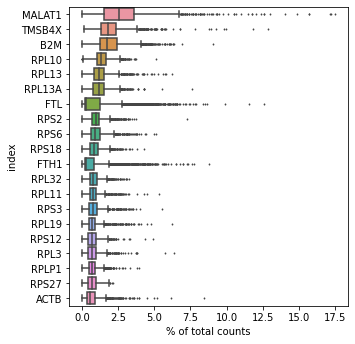

In [17]:
# Show those genes that yield the highest fraction of counts 
# in each single cell, across all cells.
sc.pl.highest_expr_genes(adata_orig, n_top=20, )

/Users/laurynbruce/miniconda3/envs/med264/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Users/laurynbruce/miniconda3/envs/med264/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:208: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)


All Genes


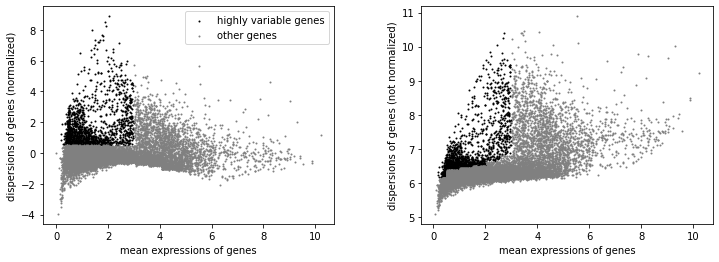

None

Highly Variable Genes


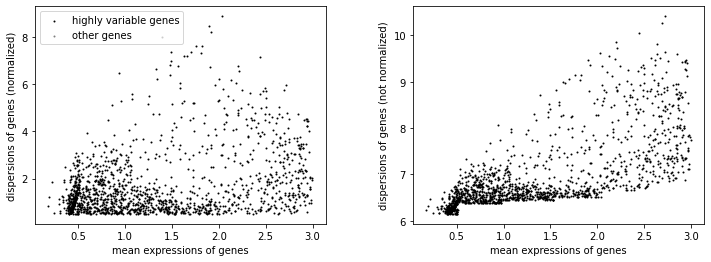

None

<ipython-input-18-1e902f522ecf>:35: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['louvain'] = processed_data.obs['louvain']


In [18]:
adata = adata_orig.copy()

# Perform basic filtering
adata.var_names_make_unique()
# filters out 19024 genes that are detected in less than 3 cells
sc.pp.filter_cells(adata, min_genes=200) 
sc.pp.filter_genes(adata, min_cells=3)

# QC
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True) # Computes many qc metrics
adata = adata[adata.obs.n_genes_by_counts < 2500, :] # Remove cells that have too many total counts
pre_mt_filter = adata.obs.copy() # save for visualization later
adata = adata[adata.obs.pct_counts_mt < 5, :] # Remove cells that have too many mitochondrial genes expressed 

expr_raw = adata.to_df() # store raw counts for DE testing
adata_unsupervised = adata.copy()

# processing
sc.pp.normalize_total(adata, target_sum=1e6) # normalize to counts-per-million (CPM)
sc.pp.log1p(adata) # logarithmize

# filter for highly variable genes (HVGs)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
print('All Genes')
display(sc.pl.highly_variable_genes(adata))
adata = adata[:, adata.var.highly_variable]
print('Highly Variable Genes')
display(sc.pl.highly_variable_genes(adata))



# transfer annotations of processed data
processed_data = sc.datasets.pbmc3k_processed()
adata.obs['louvain'] = processed_data.obs['louvain']

adata_check = adata.copy()

In [19]:
adata_unsupervised.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
index,,,,,
AAACATACAACCAC-1,781,779,2419.0,73.0,3.017776
AAACATTGAGCTAC-1,1352,1352,4903.0,186.0,3.793596
AAACATTGATCAGC-1,1131,1129,3147.0,28.0,0.889736
AAACCGTGCTTCCG-1,960,960,2639.0,46.0,1.743085
AAACCGTGTATGCG-1,522,521,980.0,12.0,1.224490
...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,1153,3459.0,73.0,2.110436
TTTCTACTGAGGCA-1,1227,1224,3443.0,32.0,0.929422
TTTCTACTTCCTCG-1,622,622,1684.0,37.0,2.197150


In [20]:
# Store the filtered expression data in an expression dataframe (matrix)
expr = adata.to_df()
# Store cell metatdata 
cell_md = adata.obs

In [21]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,louvain
index,,,,,,
AAACATACAACCAC-1,781,779,2419.0,73.0,3.017776,CD4 T cells
AAACATTGAGCTAC-1,1352,1352,4903.0,186.0,3.793596,B cells
AAACATTGATCAGC-1,1131,1129,3147.0,28.0,0.889736,CD4 T cells
AAACCGTGCTTCCG-1,960,960,2639.0,46.0,1.743085,CD14+ Monocytes
AAACCGTGTATGCG-1,522,521,980.0,12.0,1.224490,NK cells
...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,1153,3459.0,73.0,2.110436,CD14+ Monocytes
TTTCTACTGAGGCA-1,1227,1224,3443.0,32.0,0.929422,B cells
TTTCTACTTCCTCG-1,622,622,1684.0,37.0,2.197150,B cells


The expression matrix is a sparse cell by gene matrix containing log-normalized UMI counts of single-cell RNAseq measurements

In [22]:
expr.head()

index,AGRN,ATAD3C,RP1-140A9.1,RP5-892K4.1,PLCH2,RP11-312B8.1,TNFRSF9,CA6,GPR157,DRAXIN,...,BACE2,AP001610.5,WDR4,HSF2BP,AP001058.3,ICOSLG,AIRE,SLC19A1,PCBP3,AL354822.1
index,,,,,,,,,,,,,,,,,,,,,
AAACATACAACCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
AAACATTGAGCTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
AAACATTGATCAGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.764448,0.0
AAACCGTGCTTCCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
AAACCGTGTATGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


The cell metadata contains quantitative and categorical information associated with each individual measured cell

In [23]:
cell_md.head()

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,louvain
index,,,,,,
AAACATACAACCAC-1,781,779,2419.0,73.0,3.017776,CD4 T cells
AAACATTGAGCTAC-1,1352,1352,4903.0,186.0,3.793596,B cells
AAACATTGATCAGC-1,1131,1129,3147.0,28.0,0.889736,CD4 T cells
AAACCGTGCTTCCG-1,960,960,2639.0,46.0,1.743085,CD14+ Monocytes
AAACCGTGTATGCG-1,522,521,980.0,12.0,1.224490,NK cells


# Data Scaling

We will scale each feature so that expression is comparable across them. In this case, we will simply use z-scoring 

In [24]:
# axis = 0 specifies that z-scoring is done for each gene across cells rather than vice-versa
expr_scaled = stats.zscore(expr, axis = 0) 

# Save as DF with gene names as column names
expr_scaled_df = pd.DataFrame(expr_scaled, columns = expr.columns)
expr_scaled_df.head()

index,AGRN,ATAD3C,RP1-140A9.1,RP5-892K4.1,PLCH2,RP11-312B8.1,TNFRSF9,CA6,GPR157,DRAXIN,...,BACE2,AP001610.5,WDR4,HSF2BP,AP001058.3,ICOSLG,AIRE,SLC19A1,PCBP3,AL354822.1
0,-0.054916,-0.054431,-0.0337,-0.061513,-0.033704,-0.033723,-0.064275,-0.038898,-0.033698,-0.051493,...,-0.111674,-0.033691,-0.10679,-0.033712,-0.033586,-0.113814,-0.043473,-0.104758,-0.038898,-0.054846
1,-0.054916,-0.054431,-0.0337,-0.061513,-0.033704,-0.033723,-0.064275,-0.038898,-0.033698,-0.051493,...,-0.111674,-0.033691,-0.10679,-0.033712,-0.033586,-0.113814,-0.043473,-0.104758,-0.038898,-0.054846
2,-0.054916,-0.054431,-0.0337,-0.061513,-0.033704,-0.033723,-0.064275,-0.038898,-0.033698,-0.051493,...,-0.111674,-0.033691,-0.10679,-0.033712,-0.033586,-0.113814,-0.043473,-0.104758,23.723349,-0.054846
3,-0.054916,-0.054431,-0.0337,-0.061513,-0.033704,-0.033723,-0.064275,-0.038898,-0.033698,-0.051493,...,-0.111674,-0.033691,-0.10679,-0.033712,-0.033586,-0.113814,-0.043473,-0.104758,-0.038898,-0.054846
4,-0.054916,-0.054431,-0.0337,-0.061513,-0.033704,-0.033723,-0.064275,-0.038898,-0.033698,-0.051493,...,-0.111674,-0.033691,-0.10679,-0.033712,-0.033586,-0.113814,-0.043473,-0.104758,-0.038898,-0.054846


Differences in gene distributions across all cells are less pronounced after scaling, ensuring that not just highly expressed genes are biasing results: 

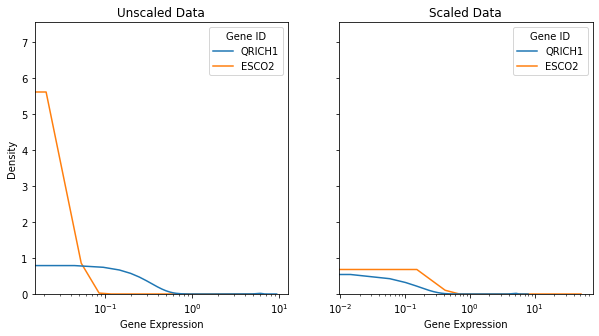

In [25]:
genes = ['QRICH1', 'ESCO2'] # genes with max and min means across all cells

fig, ax = plt.subplots(ncols = 2, figsize = (10,5), sharey = True)
sns.kdeplot(data = expr.loc[:, genes], ax = ax[0])
sns.kdeplot(data = expr_scaled_df.loc[:, genes], ax = ax[1]) #

ax[0].set_title('Unscaled Data')
ax[1].set_title('Scaled Data')
for i in range(2):
    ax[i].set_xscale('log')
    ax[i].set_xlabel('Gene Expression')
    ax[i].get_legend().set_title('Gene ID')

if want to discuss imputation, proceed here ---

A word on imputation: scRNA-seq data follows a negative binomial distribution. This means that matrices tend to be sparse:

# Linear Regression

## Continuous Variables for QC

The fraction of total genes that represent mitochondrial genes in a given cell is a QC metric. A high mitochondrial percentage indicates a cell whose cytoplasmic mRNA has leaked out through a broken membrane, and thus, only mRNA located in the mitochondria is still conserved.

A high total # of counts in a cell is also indicative of a low-quality cell, because it indicates that the measured droplet possibly contained a doublet.

These QC metrics were calculated by scanpy in the single-cell preprocessing steps and can be observed in the cell metadata:

In [26]:
cell_md[['pct_counts_mt', 'total_counts']].head()

,pct_counts_mt,total_counts
index,,
AAACATACAACCAC-1,3.017776,2419.0
AAACATTGAGCTAC-1,3.793596,4903.0
AAACATTGATCAGC-1,0.889736,3147.0
AAACCGTGCTTCCG-1,1.743085,2639.0
AAACCGTGTATGCG-1,1.224490,980.0


A common preprocessing step is to simply filter out low-quality cells using a heuristic threshold, e.g. cells with >5% of counts being mitochondrial as done in line 12 of the single-cell preprocessing:

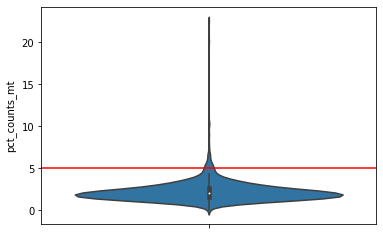

In [27]:
fig, ax = plt.subplots()
sns.violinplot(y = pre_mt_filter['pct_counts_mt'])
ax.axhline(5, color = 'red')

An alternative method is to use regression to correct for technical variance associated with QC metrics. This may be done in combination with the heuristic threshold applied above, as exemplified in the scanpy tutorial.

Some notes:
 - Due to the additional complexities of modeling sparse data, we will consider simpler scenarios in which we disregard 0 counts; this step is only included for the case of this simple example and would not be done in actual single-cell analysis.bullte
 - We will not use the scaled data, since the correction method also works as a scaling method

Let's explore this idea with one gene. First, let's calculate which gene has the highest correlation with the mitochondrial percentage across cells. 

In [28]:
regressor = 'pct_counts_mt'

In [29]:
def regressor_pearson(counts, cell_thresh = 10, cell_md = cell_md):
    counts_ = counts[counts != 0] # drop zero counts
    
    if counts_.shape[0] >= cell_thresh: # only consider those with at least cell_thresh non-zero cells
        regressor_ = cell_md.loc[counts_.index, regressor] # only consider non-zero counts for technical covariate
        pearson_r = stats.pearsonr(counts_, regressor_).statistic # get the pearsonr
    else:
        pearson_r = 0
    return pearson_r

pearson_correlation = expr.apply(lambda counts: regressor_pearson(counts)) # calculate for each gene

# see which gene has highest correlation
print('The gene with the highest correlation is {} with a Pearson r of {:.3f}'.format(pearson_correlation.idxmax(), 
                                                                                     pearson_correlation.max()))

AttributeError: 'tuple' object has no attribute 'statistic'

Next, let's build the linear regression model for this gene: gene ~ B_0 + B_1*pct_counts_mt

In [ ]:
gene = 'DLEU7'

In [ ]:
# filter expression data for non-zero counts for the selected gene 
counts_ = expr[expr[gene] != 0][gene]
# keep pct_counts_mt md for only the indices with non-zero counts
cell_md_ = cell_md.loc[counts_.index, :][[regressor]]

# do the regression
lr = LinearRegression() #initialize the class
lr.fit(y = counts_, X = cell_md_) # fit the regression model to the data

print('LR formula: {} ~ {:.3f} + {:.3f}*MITO'.format(gene, lr.intercept_, lr.coef_[0]))

In [ ]:
# pd.concat([counts_, cell_md_], axis = 1).head()

We can visualize this as well:

In [ ]:
fig, ax = plt.subplots()
viz_df = pd.DataFrame(data = {gene: counts_, regressor: cell_md_[regressor]})
display(viz_df)

# plot the data
sns.scatterplot(data = viz_df, y = gene, x = regressor, ax = ax) 

# plot the regression
min_x, max_x = viz_df[regressor].min(), viz_df[regressor].max()
x = np.linspace(min_x, max_x)
ax.plot(x, lr.coef_[0]*x + lr.intercept_, color = 'red')

# annotate the regression line
ax.annotate('{} ~ {:.3f} + {:.3f}*MITO'.format(gene, lr.intercept_, lr.coef_[0]), 
           xy = (3, 7))
ax.set_xlim(min_x - 0.2, max_x + 0.2)
plt.show()

To control for this, we can replace the count values with the residuals of the regression (i.e., the difference between scatter point and the red line on the graph above). This residual represents the actual biological variation in the data after correcting for the technical variation:

In [ ]:
residuals_df = cell_md_.copy()

# get the model-estimated value for the gene count at each mitochondrial percentage value
predicted_counts = lr.predict(cell_md_)

residuals_df['Actual_Counts'] = counts_
residuals_df['Predicted_Counts'] = predicted_counts

# get the difference between the actual and model-estimated values
residuals_df['Corrected_Counts'] = residuals_df.Actual_Counts - residuals_df.Predicted_Counts

residuals_df.sort_values(by = regressor, inplace = True)
residuals_df.head()

We can see that the correlation between the new corrected counts and the mitochondrial percentage is now gone:
    


In [ ]:
r = stats.pearsonr(residuals_df.Corrected_Counts, residuals_df[regressor]).statistic
print('The correlation after correction is {:.2e}'.format(r))

We can see that the residual values no longer correlate with mitochondrial percentage, and also that the values are scaled. Note also that this essentially rotates that data about the ordinary least squares (OLS) line of best fit:

In [ ]:
fig, ax = plt.subplots()

# plot the data
sns.scatterplot(data = residuals_df, y = 'Corrected_Counts', x = regressor, ax = ax) 
ax.axhline(0, color = 'red')

Since we are considering two QC metrics (mitochondrial % & total counts), our actual model will actually be a multi-linear regression:

In [ ]:
regressor = ['pct_counts_mt', 'total_counts']
cell_md_ = cell_md.loc[counts_.index, regressor]

In [ ]:
# do the regression
lr = LinearRegression() #initialize the class
lr.fit(y = counts_, X = cell_md_) # fit the regression model to the data

print('LR formula: {} ~ {:.3f} + {:.3f}*MITO + {:.3f}*TOTAL_COUNTS'.format(gene, lr.intercept_, lr.coef_[0], 
                                                                           lr.coef_[1]))

In this particular example, it seems that the total counts has a small effect size (i.e., does not contribute much to the technical variation in the data). We can proceed with repeating the correction process:

In [ ]:
# get the model-estimated value for the gene count at each mitochondrial percentage value
predicted_vals = lr.predict(cell_md_)
# get the difference between the actual and model-estimated values
corrected_counts = counts_ - predicted_vals

## Categorical Variables for Differential Expression Testing

Differential expression tests for relative differences in gene expression between two conditions. Regression analysis is often used for this purpose to account for the distribution of the data.    

Here, let's try to identify markers of CD8+ T-cells, which involves testing for DE genes of cells annotated as CD8+ T-cells vs the rest of cells. Note that we have cell type annotations (the categorical variable of interest) from the processed data. Typically, we would first use an unsupervised learning approach to get cell clusters (see below), and then proceed to annotate the cell types from the cluster markers.

Some words on more complicated topics that we won't cover: 

1. Regression of categorical data with multiple categories is  analogous to ANOVAs. We do not show it here, but if you had 3 sample conditions (e.g., control, treatment A, treatment B), you could run a linear regression testing the different between each group mean and the control. If there is no control (treatments A-c), you can change the contasts to test for the different between the group and the grand mean
2. We will use a simple linear regression, but most differential expresion tools will use a generalized linear model (GLM) that more accurately emulates the data distribution and eliminates some assumptions of simple linear regression. 
3. Furthermore, these models will often use a multi-variate regression to introduce a covariate that can account for technical confounders (e.g., a categorical variable annotating the batch or a continuous latent variable capturing the technical variance)
 
Because of points 2-3, DE testing is often done using the raw rather than processed counts, unfiltered for HVGs. 

In [ ]:
cell_md.head()

In [ ]:
cell_md.louvain.unique()

In [ ]:
# get the barcode of cells annotated as cd8
cd8_barcodes = cell_md[cell_md.louvain == 'CD8 T cells'].index
other_barcodes = cell_md[cell_md.louvain != 'CD8 T cells'].index

# filter the raw data for annotated cell types, and order according to condition
expr_raw = pd.concat([expr_raw.loc[cd8_barcodes, :], expr_raw.loc[other_barcodes, :]])

Let's begin with one gene as a simple example. We will proceed with granzyme A, a cytolytic molecule commonly secreted by CD8+ T-cells

In [ ]:
gene = 'GZMA'
# format the data
reg_df = expr_raw[[gene]]
reg_df['Cell_Type'] = (['CD8'] * cd8_barcodes.shape[0]) + (['other'] * other_barcodes.shape[0])

reg_df

We can see that there are in fact expression differences for granzyme A in CD8 T cells 

In [ ]:
fig, ax = plt.subplots()
sns.violinplot(data = reg_df, y = gene, x = 'Cell_Type', ax = ax)
ax.set_ylim(ax.get_ylim()[0], 10);

Now, let's create the contasts:

In [ ]:
# ordering the categorical data will ensure that we are testing for CD8 expression relative to the rest, rather
# than vice-versa
reg_df['Cell_Type'] = pd.Categorical(reg_df['Cell_Type'], 
                                     ordered=True, categories=['other', 'CD8'])

# get the dummy variables
# dropping the first category resolves issues of multi-collinearity
# the first category is instead encoded by all 0s (the intercept)
reg_df['Contrast'] = pd.get_dummies(reg_df.Cell_Type, drop_first = True).iloc[:, 0]
reg_df

#### Aside

imagine we had 3 conditions - treatment A, treatment B, and a control. Then, the contrasts would be more complicated and the regression would include more coefficients (gene ~ TreatA + TreatB):

In [ ]:
example_df = reg_df.copy()

random.seed(888)
conditions = ['Control', 'TreatA', 'TreatB']
treatment = random.choices(conditions, k = reg_df.shape[0])
example_df['Treatment'] = pd.Categorical(treatment, ordered=True, categories=conditions)

pd.concat([example_df[[gene, 'Treatment']], pd.get_dummies(example_df.Treatment, drop_first = True)], axis = 1)

Now that we have our contrast, we can run the regression model:

In [ ]:
# do the regression
lr = LinearRegression() #initialize the class
lr.fit(y = reg_df[gene], X = reg_df[['Contrast']]) # fit the regression model to the data


Interpretation

1. The intercept is the expected mean of granzyme A expression in the non CD8Tcells (when Contrast = 0)
2. The coefficient is the expected change in granzyme A expression in CD8 T-cells relative to the rest of cells 

In [ ]:
print('The regression intecept is {:.2f}'.format(lr.intercept_))

mean_gzm_other = reg_df[reg_df.Cell_Type == 'other'][gene].mean()
print('The average expression of granzyme A in non CD8+ T-cells is is {:.2f}'.format(mean_gzm_other))

In [ ]:
print('The regression coefficient is {:.2f}'.format(lr.coef_[0]))

mean_gzm_cd8 = reg_df[reg_df.Cell_Type == 'CD8'][gene].mean()
log_fold_change = np.log(mean_gzm_cd8/mean_gzm_other)

print('The log-fold-change in average expression of granzyme A between CD8+ T-cells and the rest is {:.2f}'.format(log_fold_change))

Furthermore, regression coefficient's have a p-value associated with them (t-test or Wald's test), so we have both the effect size (coefficient value) and significance (p-value) of the differential expression for this gene. DE testing simply extends this to all genes (must add a multiple test correction for the p-values). Use the statsmodels package to get the p-values. 

Again, note that to correct for some technical covariate, we could simply add it to the regression model and follow the same interpretation for the Contrast coefficient we already incorporated here (gene ~ B_0 + B_1 x Contrast + B_2 x Technical_Covariate)

# Dimensionality Reduction

### Principle Component Analysis (PCA)
We can reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the main axes of variation and denoises the data.

In [ ]:
# We are changing the preprocessing of the single-cell data just a little
# to align with the unsupervised scanpy tutorial
sc.pp.normalize_total(adata_unsupervised, target_sum=1e4)
sc.pp.log1p(adata_unsupervised)
sc.pp.highly_variable_genes(adata_unsupervised, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata_unsupervised = adata_unsupervised[:, adata_unsupervised.var.highly_variable]
sc.pp.regress_out(adata_unsupervised, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata_unsupervised, max_value=10)

# Saving the new unsupervised scaled ata
expr_scaled_unsupervised = adata_unsupervised.to_df()
expr_scaled_unsupervised

In [ ]:
# Import the PCA from the sklearn.decomposition package
from sklearn.decomposition import PCA

pca = PCA(n_components=100) # initialize the class to determine first 100 components
pca_data = pca.fit_transform(expr_scaled_unsupervised)
display(pca_data.shape)

# Can get the values of explained variation for each PC
print(pca.explained_variance_)

# Plot amount of variance explained by each of the components
plt.scatter(range(0,100), pca.explained_variance_, alpha=0.2)
plt.title('Amount Variance Explained')
plt.xlabel('PCA')
plt.ylabel('Explained Variance')
plt.show()

In [ ]:
# Plot the first two principle components
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1])
plt.title('PCA of First Two Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# Clustering

### K-means clustering

We can incorporate the newly obtained PCA scores in the K-means algorithm. 
That's how we can perform classification based on principal components scores instead of the original features by using the scores obtained by the PCA for the K-means model fit.

In [ ]:
# Import the PCA from the sklearn.decomposition package
from sklearn.cluster import KMeans

In [ ]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state=42) # initialize the class to create 4 clusters
x_clustered = kmeans_pca.fit_predict(pca_data)
display(x_clustered.shape)

# Save the first two components PCA scores and the cluster number in a data frame
pca_data_df = pd.DataFrame(pca_data)
pca_data_df = pca_data_df.iloc[:,0:2]
pca_data_df.columns = ['PC1', 'PC2']
pca_data_df['cluster'] = x_clustered
pca_data_df

In [ ]:
# Plot with the PCA with the cluster labels
import seaborn as sns
sns.color_palette("hls", 8)
sns.scatterplot(data=pca_data_df, x='PC1', y='PC2', hue='cluster', palette='tab10')
plt.title('PCA of First Two Components with Cluster Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# Classification: Random Forest

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

A challenging step in single-cell analysis is annotating cells with relevant cell types. One approach is to use a classifier to transfer lables from an annotated dataset to the dataset of interest, using the genes as features for the classifier. 

Here, we will train a random forest classifier on a subset of the data to annotate the remainder of the cells. Because all cells are already annotated, we can assess the performance. To make the problem even simpler, we will only consider a binary classification problem: T-cell vs not T-cell

In [ ]:
cell_md = adata.obs

# binarize the data
binary_celltypes = {'CD4 T cells': 1, 
                    'B cells': 0, 
                    'CD14+ Monocytes': 0, 
                    'NK cells': 0, 
                    'CD8 T cells': 1, 
                    'FCGR3A+ Monocytes': 0, 
                    'Dendritic cells': 0, 
                    'Megakaryocytes': 0}
cell_type = cell_md.louvain.map(binary_celltypes)

# cell_type = cell_md['louvain']
# y_actual = label_binarize(cell_type, classes = [0,1])
# print(*cell_type.unique().tolist(), sep = ', ')

In [ ]:
# # We will use the principal components instead of genes as features, because this will improve computational time and can potentially improve performance by denoising the data and preventing overfitting

# n_pcs = 100
# sc.pp.regress_out(adata_check, ['total_counts', 'pct_counts_mt'])
# sc.pp.scale(adata_check)
# sc.tl.pca(adata_check, svd_solver='arpack', n_comps = n_pcs, random_state = 888)
# X_pca = pd.DataFrame(adata_check.obsm['X_pca'])
# # X_pca.columns = ['PC_{}'.format(i+1) for i in range(X_pca.shape[1])]
# # X_pca.index = cell_md.index

# # # samples (cells) by features (principal components) matrix
# # X_pca.head()

# plt.scatter(X_pca[0], X_pca[1])

# sc.pp.neighbors(adata_check, n_pcs=25)
# sc.tl.umap(adata_check)

# sc.pl.umap(adata_check)

Generate the training and test data:

In [ ]:
# split the data s.t. a fraction of samples are assigned to training and a fraction are assigned to testing

X_train, X_test, y_train, y_test = train_test_split(expr_scaled, cell_type, 
                                                    train_size = 0.8, test_size = 0.2, 
                                                   random_state = 888)

Build and run the model:

In [ ]:
# creating a RF classifier that assess splits on mutual information
rfc_mod = RandomForestClassifier(criterion = 'log_loss', n_jobs = 8, random_state = 888) 
# build the model on the training data
rfc_mod.fit(X_train, y_train)

# annotate the test dataset with predicted labels
y_pred = rfc_mod.predict(X_test)

# assess the accuracy of the model 
mod_acc = metrics.accuracy_score(y_test, y_pred)

print('The model accuracy is {:.2f}'.format(mod_acc))

Visualize the ROC and calculate the AUC:

In [ ]:
metrics.RocCurveDisplay.from_estimator(rfc_mod, X_test, y_test)